# Import stuff

In [4]:
# %matplotlib inline
# %matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Define functions

In [5]:
def get_data(line_number, filename = 'redshift.txt'): # read the data from the file

    lists = open(filename).read().splitlines()
    lists = lists[line_number].split(', ')
    lists = list(map(float, lists))
    return lists

def averages(BLLac, FSRQ, other): # print the average redshifts
    
    print('N        = ' + str(len(BLLac) + len(FSRQ) + len(other)))
    print('<BL Lac> = ' + str(round(np.mean(BLLac), 2)))
    print('<FSRQ>   = ' + str(round(np.mean(FSRQ), 2)))
    
def plotting(BLLac, FSRQ, other, plot, y_limit, save_name): # plot the data
    
    color = 'black'

    if plot:
        color = 'white'

    bins = np.linspace(0, 5, 11)
    
    plt.rcParams['font.family'] = 'serif'
    plt.figure(figsize = (13.92, 8.60))

    plt.hist(BLLac, bins = bins, alpha = 1, lw = 4, histtype = 'step', fill = False, color = 'red', label = 'BL Lacs')
    plt.hist(FSRQ, bins = bins, alpha = 1, lw = 4, histtype = 'step', fill = False, color = 'blue', label = 'FSRQs', linestyle = '--')
    plt.hist(other, bins = bins, alpha = 1, lw = 4, histtype = 'step', fill = False, color = 'black', label = 'Others', linestyle = '-.')

    plt.xlabel('$z$', fontsize = 30, color = color)
    plt.ylabel('$N$', fontsize = 30, color = color)
    plt.xlim(0, 4.5)
    plt.ylim(0, y_limit)

    plt.xticks(fontsize = 30, color = color)
    plt.yticks(fontsize = 30, color = color)

    ax = plt.gca()
    yticks = ax.yaxis.get_major_ticks() 
    yticks[0].label1.set_visible(False)

    legend = plt.legend(bbox_to_anchor = (0, 1.0, 1, 0), loc = 'lower left', mode = 'expand', numpoints = 1, fontsize = 30, ncol = 4,
                      frameon = False)
    plt.setp(legend.get_texts(), color = color)

    if not plot:
        plt.savefig('../images/z-histogram-' + str(save_name) + '.pdf', bbox_inches = 'tight', format = 'pdf')
    elif plot:
        plt.show()

    plt.show()
    
def make_plots(the_name, line0, line1, line2, plot_to_notebook, y_limit): # call the get_data, averages, and plotting functions
    BLLac = get_data(line0)
    FSRQ  = get_data(line1)
    other = get_data(line2)

    averages(BLLac, FSRQ, other)
    plotting(BLLac, FSRQ, other, plot_to_notebook, y_limit, the_name)

# Plot the data
The redshifts for my sample were taken from 3LAC in the first instance. If there was no redshift value there, it was taken from BZCAT. Values flagged with a question mark were used. If there was no redshift value there, NED was checked. If there was no value there, it was excluded.

N        = 89
<BL Lac> = 0.79
<FSRQ>   = 1.28


<IPython.core.display.Javascript object>


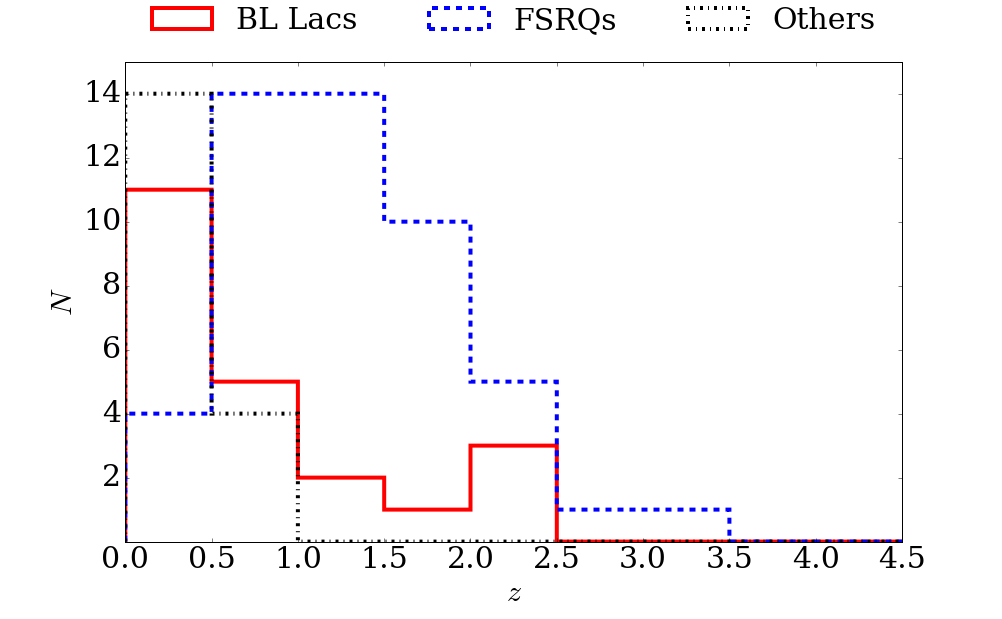

In [6]:
if __name__ == '__main__':
    make_plots('sample', 6, 7, 8, False, 15)

N        = 2842
<BL Lac> = 0.42
<FSRQ>   = 1.44


<IPython.core.display.Javascript object>


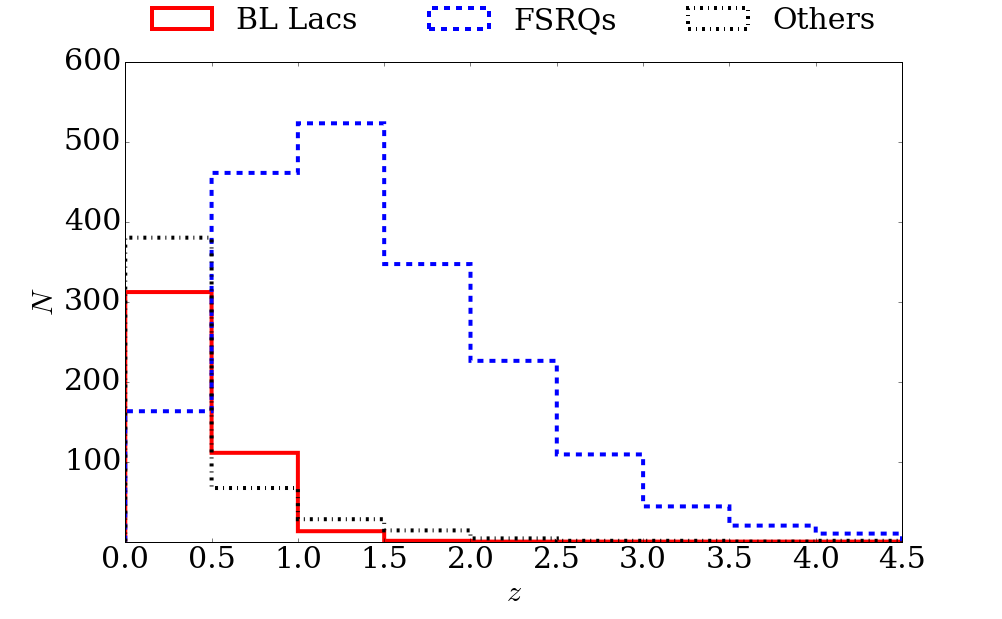

In [7]:
if __name__ == '__main__':
    make_plots('bzcat', 11, 12, 13, False, 600)

N        = 896
<BL Lac> = 0.41
<FSRQ>   = 1.21


<IPython.core.display.Javascript object>


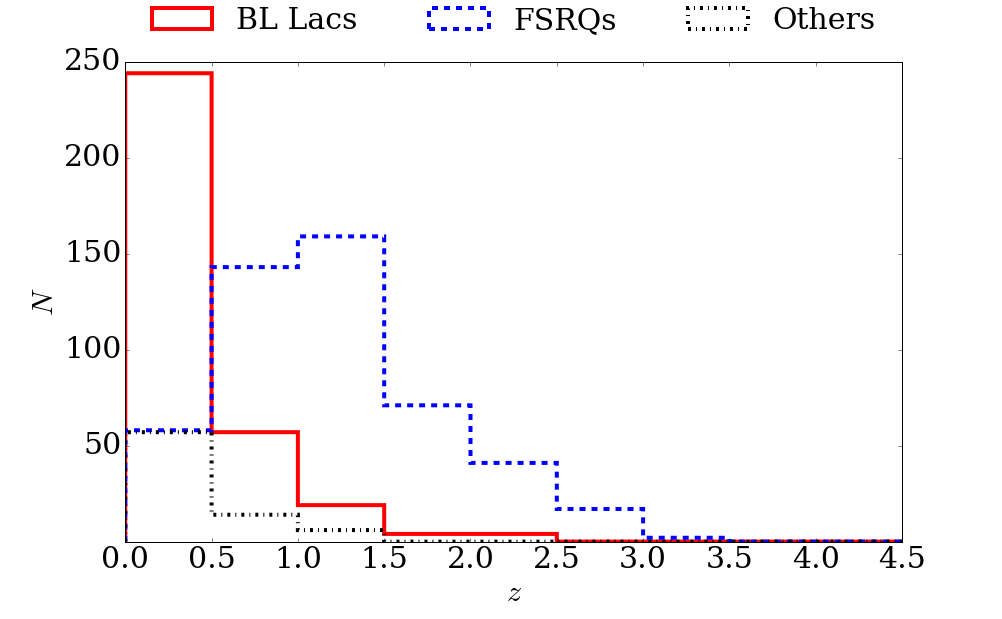

In [8]:
if __name__ == '__main__':
    make_plots('3fgl', 16, 17, 18, False, 250)